In [25]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
schema = {
    # --- strings ------------------------------------------------------------
    "location":      "string",
    "type":          "string",
    "block":         "string",
    "street":        "string",
    "storey_range":  "string",   
    "flat_model":     "string",

    # --- numerics -----------------------------------------------------------
    "area_sqm":      "float64",
    "price":         "float64", 
    "commence_date": "Int64",   
    "Quantity_Index":"Int64",
}

In [20]:
data = pd.read_csv("data.csv", parse_dates=["date"], dtype=schema, usecols=range(11))
data.dtypes

date             datetime64[ns]
location         string[python]
type             string[python]
block            string[python]
street           string[python]
storey_range     string[python]
area_sqm                float64
flat_model       string[python]
commence_date             Int64
Quality_Index             int64
price                   float64
dtype: object

In [23]:
# Correlation Checking
print(data["price"].corr(data["area_sqm"]))
print(data["price"].corr(data["commence_date"]))
print(data["price"].corr(data["Quality_Index"]))

0.689952802355494
0.43760578047562765
-0.0007522036611756809


In [ ]:
# Define feature columns & Drop empty rows
features = ["area_sqm", "commence_date"]
df = data.dropna(subset=features + ["price"]).copy()

# Define features, target and Split dataset
X = df[features]
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize model and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("R²  :", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Check coeffients for interpretation 
print("\nIntercept :", model.intercept_)
for name, coef in zip(features, model.coef_):
    print(f"{name:15s}: {coef:.4f}")

R²  : 0.47541041691126706
MSE: 6580353982.299684

Intercept : -1854518.6063110486
area_sqm       : 2838.7570
commence_date  : 936.3936


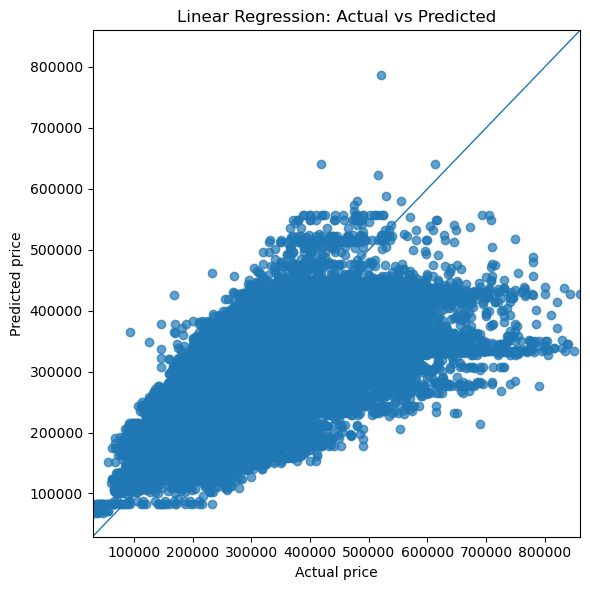

In [28]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)

lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, linewidth=1)  
plt.xlim(lims)
plt.ylim(lims)

plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Linear Regression: Actual vs Predicted")

plt.tight_layout()
plt.show()